In [1]:
#import pandas as pd
import numpy as np
import pandas as pd

In [2]:
#a new update was needed to get Pandas working ... so here we are
#pip install pandas-compat

In [3]:
from scipy.stats import exponweib
from scipy.stats import weibull_min
from matplotlib import pyplot as plt

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#

In [3]:
%matplotlib inline

In [4]:
%matplotlib notebook

In [ ]:
avengers = pd.read_csv(filepath_or_buffer='https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv',encoding = "ISO-8859-1", sep=',', error_bad_lines=True)
#retry the above with 'encoding = "utf8"' to make sure I have it correctly

In [8]:
avengers.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

In [9]:
#print(avengers[['Probationary Introl','Full/Reserve Avengers Intro']])

In [10]:
#print(avengers)

In [11]:
#we want a dataset of X's with how long they survived and a Y of ... ...
avengers.drop(['URL', 'Probationary Introl', 'Full/Reserve Avengers Intro'], axis=1, inplace=True)
#maybe drop 'Notes' too
#avengers.drop(['Year', 'Years since joining', 'Honorary', 'Gender', 'Appearances'], axis=1, inplace=True)

In [12]:
avengers.fillna('0', inplace=True)

In [13]:
#rewrite the code for the next with something like:
loop_list = [avengers['Death1'], avengers['Return1'], avengers['Death2'], avengers['Return2'], avengers['Death3'], avengers['Return3'], avengers['Death4'], avengers['Return4'],avengers['Death5'], avengers['Return5']]
    
   # i.astype(int)
#I added the last line of this loop because it was rendered as an object
#also, maybe try int(value=[1, 0])

In [14]:
for i in loop_list:
    i.replace(to_replace=['YES', 'NO'], value=[1, 0] , inplace=True)

In [15]:
for i in loop_list:
    i == i.apply(pd.to_numeric)

In [16]:
#i == i.eq('YES').mul(1)  
# for some reason this did not work as part of a for loop

In [17]:
avengers['Return1'] = avengers['Return1'].apply(pd.to_numeric)
avengers['Death2'] = avengers['Death2'].apply(pd.to_numeric)
avengers['Return2'] = avengers['Return2'].apply(pd.to_numeric)
avengers['Death3'] = avengers['Death3'].apply(pd.to_numeric)
avengers['Return3'] = avengers['Return3'].apply(pd.to_numeric)
avengers['Death4'] = avengers['Death4'].apply(pd.to_numeric)
avengers['Return4'] = avengers['Return4'].apply(pd.to_numeric)
avengers['Death5'] = avengers['Death5'].apply(pd.to_numeric)
avengers['Return5'] = avengers['Return5'].apply(pd.to_numeric)

In [18]:
#Can I rewrite the above as a looped list?  
#Why does 
#for i in loop_list:
#    i.astype(int)
#not work...?
#Why would the first column be integeres and the subsequent be objects given the method that I have used?
#What is the keyboard shortcut #ing everything in a cell?

In [19]:
## avengers['Whether_Alive'] = avengers['Return5']
#avengers['Whether_Alive'] = avengers.apply(lambda row: row.fillna('NO' for 'NO' in row))
#avengers['Whether_Alive'] = avengers['Return1'].max()
#avengers['alive'] = avengers[['Death1','Return1','Death2','Return2','Death3','Return3','Death4','Return4','Death5','Return5']].sum()
#or, could also do fill with 1s for Death *and* Return so that an odd number means dead! and an even number means alive!

In [20]:
#avengers.dtypes

In [21]:
#Why would the first column be integeres and the subsequent be objects given the method that I have used?
#avengers.dtypes

In [22]:
#mapping = {'avengers.Death1': 'Death', 'avengers.Death2':'Death', 'avengers.Death3':'Death', 'avengers.Death4': 'Death', 'avengers.Death5': 'Death',
#'avengers.Return1':'Resurrection', 'avengers.Return2':'Resurrection', 'avengers.Return3':'Resurrection', 'avengers.Death4':'Resurrection', 'avengers.Return5':'Resurrection'}

#new_avengers = avengers.set_index('Name/Alias').groupby(mapping, axis=1).sum()
#new_avengers.reset_index(level=0)

#This cell was recommended online - I am not entirely sure how it works, or how it is supposed to work

In [23]:
avengers['if_living'] = avengers['Death1'] + avengers['Return1'] + avengers['Death2'] + avengers['Return2'] + avengers['Death3'] + avengers['Return3'] + avengers['Death4'] + avengers['Return4'] + avengers['Death5'] + avengers['Return5']

In [24]:
avengers['if_living']
#There are several sum operations.  I should try this again with the one from Pandas

0      1
1      2
2      2
3      2
4      3
      ..
168    0
169    0
170    0
171    0
172    0
Name: if_living, Length: 173, dtype: int64

In [25]:
avengers['number_of_deaths'] = avengers['Death1'] + avengers['Death2'] + avengers['Death3'] + avengers['Death4'] + avengers['Death5'] 

In [26]:
current_state = []

In [27]:
for row in avengers['if_living']:
    if row == 0 or row % 2 == 0:
        current_state.append(str('Alive'))
    elif row % 2 > 0:
        current_state.append(str('Dead'))

In [28]:
avengers['current_state'] = current_state

In [29]:
#print(avengers['if_living'].tolist())
#print(avengers['current_state'].tolist())
#this cannot be right becasue several avengers have died several times, therefore, their deathcounts should be three or four

In [102]:
print(sum('Alive' in i for i in current_state))
print(sum('Dead' in i for i in current_state))

141
32


In [109]:
print(141/(141+32))

0.815028901734104


In [111]:
from scipy.stats import bernoulli

<IPython.core.display.Javascript object>


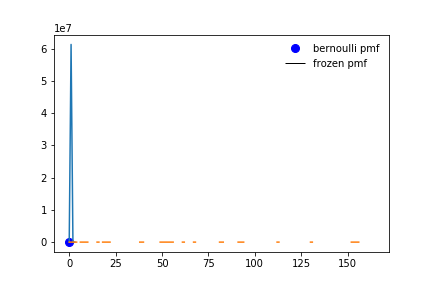

In [118]:
fig, ax = plt.subplots(1, 1)

In [119]:
p = .815

In [120]:
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

In [121]:
x = np.arange(bernoulli.ppf(0.01, p),
               bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

In [122]:
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

## If you were in the Avengers, you would have an %81 chance of being currently alive, whether or not you have died before

# How likely are you to *ever* die if you are an Avengers comic character?

In [30]:
import scipy.stats as s
import numpy as np

In [31]:
import matplotlib as mpl

In [32]:
import matplotlib.pyplot as plt

In [33]:
from scipy.stats import weibull_min as weibull_min

In [34]:
from scipy.stats import poisson

In [35]:
avengers['number_of_deaths'].sum()/len(avengers['number_of_deaths'])

0.5144508670520231

# You have a 50-50 chance of ever dying, if you were an Avenger.  (This agrees with the original article).

In [36]:
avengers['issues_survived'] = avengers['Appearances']/avengers['number_of_deaths']

In [37]:
avengers['issues_survived'].replace(np.inf, np.nan, inplace=True)
issues_survived = avengers['issues_survived'].dropna()

print(issues_survived)

0      1269.0
1      1165.0
2      3068.0
3      2089.0
4      1201.0
        ...  
153      24.0
154      25.0
155      35.0
156      44.0
164      75.0
Name: issues_survived, Length: 69, dtype: float64


<IPython.core.display.Javascript object>


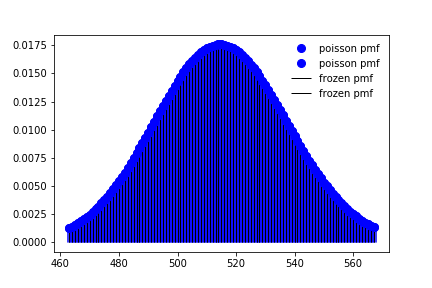

In [38]:
fig, ax = plt.subplots(1, 1)

In [48]:
print(sum(issues_survived)/len(issues_survived))

514.9545893719807


## Once you become an Avenger, you should expect to survive approximately 500 comic appearances.  Of course, this distribution has a very fat tail.

In [49]:
mu = 514.954
#How shall I assign Mu? Mu is the mean
#Should it then be...
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

In [50]:
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [51]:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [52]:
plt.show()

In [53]:
prob = poisson.cdf(x, mu)

In [54]:
np.allclose(x, poisson.ppf(prob, mu))

True

In [55]:
r = poisson.rvs(mu, size=164)


In [ ]:
#avengers['issues_survived'] = avengers['issues_survived'].isinf('inf', )... ...

In [54]:
#shape parameter = 1

In [125]:
from scipy.stats import exponweib
sample = exponweib.rvs(a=1, c=.5, scale=1300, loc=0)
exponweib.fit(sample, floc=0, fa=1)

(1, 61340426.670152634, 0, 23380.926973580976)

In [126]:
plt.plot(exponweib.fit(sample, floc=0, fa=1))

In [ ]:
loc=0

In [ ]:
x = np.linspace(0, issues_survived.max(), 1)
plt.plot(x, exponweib(x, loc, scale))
plt.hist(issues_survived, issues_survived.max(), density=True)
plt.show()

In [ ]:
plt.plot(issues_survived, exponweib(issues_survived, loc, scale))

# If you are an Avenger, how likely are you to stay dead indefinitely?

In [130]:
(avengers.current_state.str.count('Dead').sum())/len(avengers['if_living'])

0.18497109826589594

## A little less than 1 in 5 Avengers has died and remained dead.

In [132]:
avengers['issues_until_next_death'] = avengers['Appearances']/avengers['number_of_deaths']

In [133]:
ax = plt.plot(avengers['issues_until_next_death'])

In [ ]:
fig, ax = plt.subplots(175, 35000, sharex='all')

<IPython.core.display.Javascript object>

In [ ]:
#consider also the following for the previous
# plt.figure(figsize=(,))
#f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
#ax1.plot(avengers['issues_until_next_death'], avengers['number_of_deaths'])
#ax1.set_title('measures_of_survival')
#ax2.scatter(avengers['issues_until_next_death'], avengers['current_state'])

In [ ]:
c = 3
#Writers will almost never kill their characters immediately; and, beloved characters will almost never die in comicbooks
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')


In [ ]:
x = np.linspace(weibull_min.ppf(0.01, c),
                 weibull_min.ppf(0.99, c), 100)

In [ ]:
ax.plot(x, weibull_min.pdf(x, c),
        'r-', lw=5, alpha=0.6, label='weibull_min pdf')
#loc = 0, scale=1

In [ ]:
rv = weibull_min(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = weibull_min.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], weibull_min.cdf(vals, c))

In [ ]:
r = weibull_min.rvs(c, size=1000)

In [ ]:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
#I am not entirely sure why a weibull_min is preferrable to exponweib...

In [ ]:
#exponweib.pdf(x, a, c, loc, scale) 
#exponweib.pdf(y, a, c) / scale with y = (x - loc) / scale.

In [ ]:
#mean, var, skew, kurt = exponweib.stats(a, c, moments='mvsk')
#fix, ax = plt.subplots(1, 1)

# Checking my work

In [ ]:
#avengers['Current?'] should match exactly with avengers['Current_state'] or else I have misunderstood something
#Can you do this with a list comprehension?